# SSA Guide

## Load Data Set
This data set contains the data anout the energy consumption for 5 Countries from 1991 to 2008 and available via load_ method

In [1]:
from py_ssa_lib.datasets.load_energy_consumption_df import load_energy_consumption_df

In [2]:
df = load_energy_consumption_df(rawDS=False)

In [3]:
df

,Unnamed: 0,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,0,France,9.73804,9.79360,9.80209,9.78123,10.05206,10.42370,10.36194,10.58991,10.71493,10.85032,11.08966,10.99795,11.11784,11.30309,11.35252,11.37692,11.19392,11.29033
1,1,Canada,11.11733,11.46716,11.70631,12.02414,12.21325,12.56482,12.66968,12.35699,12.97692,13.07669,12.87847,13.10786,13.52061,13.83128,14.16374,13.81736,14.07179,14.02923
2,2,Germany,14.29970,14.03830,14.07232,14.01249,14.38346,14.39479,14.34024,14.32692,14.10906,14.26147,14.61945,14.32545,14.58721,14.70148,14.39950,14.65476,14.18592,14.35692
3,3,China,28.15790,29.26608,30.03294,34.11046,34.75640,35.55399,37.74732,37.03964,36.51251,36.35203,38.41214,43.90988,51.15543,62.91903,68.24567,72.89060,78.00135,85.05974
4,4,Netherlands,3.49513,3.46788,3.53898,3.50781,3.57542,3.73327,3.69939,3.69151,3.68246,3.79417,3.92984,3.93964,4.00102,4.11195,4.22233,4.13898,4.37748,4.32717


We get rid of unwanted columns

In [4]:
df = df.iloc[:,1:]

In [5]:
df

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,9.73804,9.79360,9.80209,9.78123,10.05206,10.42370,10.36194,10.58991,10.71493,10.85032,11.08966,10.99795,11.11784,11.30309,11.35252,11.37692,11.19392,11.29033
1,Canada,11.11733,11.46716,11.70631,12.02414,12.21325,12.56482,12.66968,12.35699,12.97692,13.07669,12.87847,13.10786,13.52061,13.83128,14.16374,13.81736,14.07179,14.02923
2,Germany,14.29970,14.03830,14.07232,14.01249,14.38346,14.39479,14.34024,14.32692,14.10906,14.26147,14.61945,14.32545,14.58721,14.70148,14.39950,14.65476,14.18592,14.35692
3,China,28.15790,29.26608,30.03294,34.11046,34.75640,35.55399,37.74732,37.03964,36.51251,36.35203,38.41214,43.90988,51.15543,62.91903,68.24567,72.89060,78.00135,85.05974
4,Netherlands,3.49513,3.46788,3.53898,3.50781,3.57542,3.73327,3.69939,3.69151,3.68246,3.79417,3.92984,3.93964,4.00102,4.11195,4.22233,4.13898,4.37748,4.32717


##  SSA

In comparison to the MSSA, the SSA method can process only one time series at time. We start with the case for one time series in order to better understand how the SSA works. Subsequently, we consider how SSA can be applied on the multivariate case, e.g for the multiple time series case.

### Setup

We start with the import of the class SSA

In [6]:
from py_ssa_lib.SSA import SSA

Then it is necessary to define the parameters for the SSA 

In [7]:
idx_start = 1 # the index of the first column where time series begin
ts_index = 0 # the index of time series to be processed
window_size = 7 # the most important parameter of the MSSA, also denoted as L in the literature
decomposition = "svd" # for svd decomposition use either "svd", or "rand_svd" for full and approximated svd decomposition

The window size $L$ is the most important parameter as it defines the size of the trajectory matrices. This matrix is essential and is decomposed using the $SVD$ Decomposition. The corresponding parameter allows to choose between the full $SVD$ which outputs all eigenvalues and eigenvectors, and **randomized SVD**, which preserves only the $L/2 - L/3 - 1$ largest eigenvalues and is extremely useful when the time series is large, e.g $N$ or $M$ > 100, where $N$ is a number of columns containing nummeric value/record for the time step in the time series (here, $N=18$), and  $M$-number of times series in the data set (here, $M=1$, for the multivariate case $M=5$)

### Fit SSA to the Dataset

Now we are set to initialize and fit our SSA on th data set

In [8]:
# mssa_inst = SSA(Verbose=True) # uncomment this section to output inner parameters of the instance
ssa_inst = SSA() 
ssa_inst.fit(df=df, L=window_size, decomposition=decomposition, idx_start_ts=idx_start, ts=ts_index  )


### Grouping Components for the Reconstruction

There are 3 methods available for the grouping of eigentriples and consequently, the elementary matrices. These are used for the reconstruction of the particular components of the fited time series.
All of them are visual:

#### Inspect the Behaviour of the Lefthand-side Eigenvectors $U$ and the Contribution of the Corresponding Eigenvalues

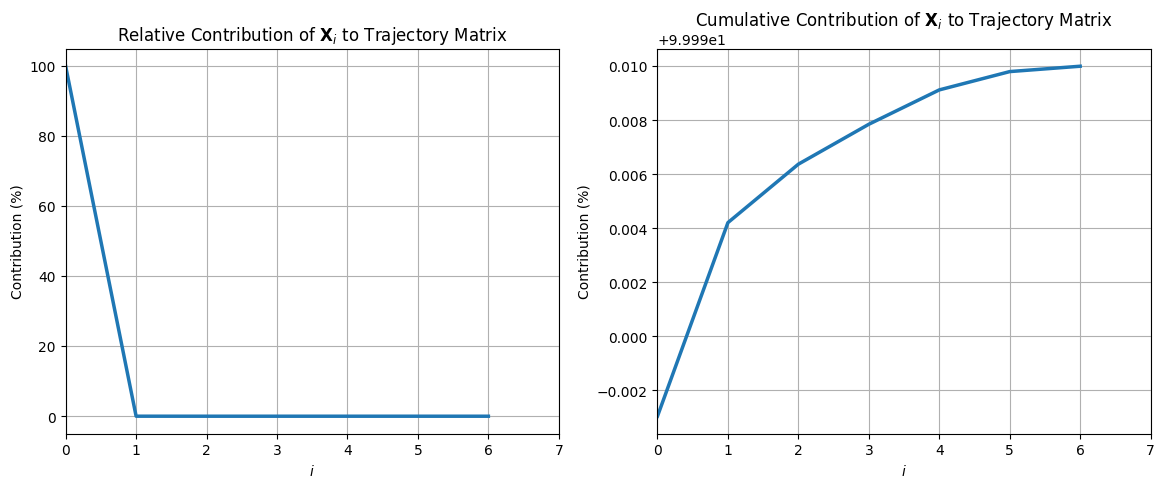

In [9]:
ssa_inst.plot_eigenvals_contribution()

Generally, $U$ can consist of a large number of column vectors, so for the better visualization it is better to limit number of displayed eigenvectors. 

The function **plot_eigenvectors(i_start=start_i, i_end=end_i)** has 2 parameters which are used for slicing $U$ and the last index is less or equal the total number of eigenvalues

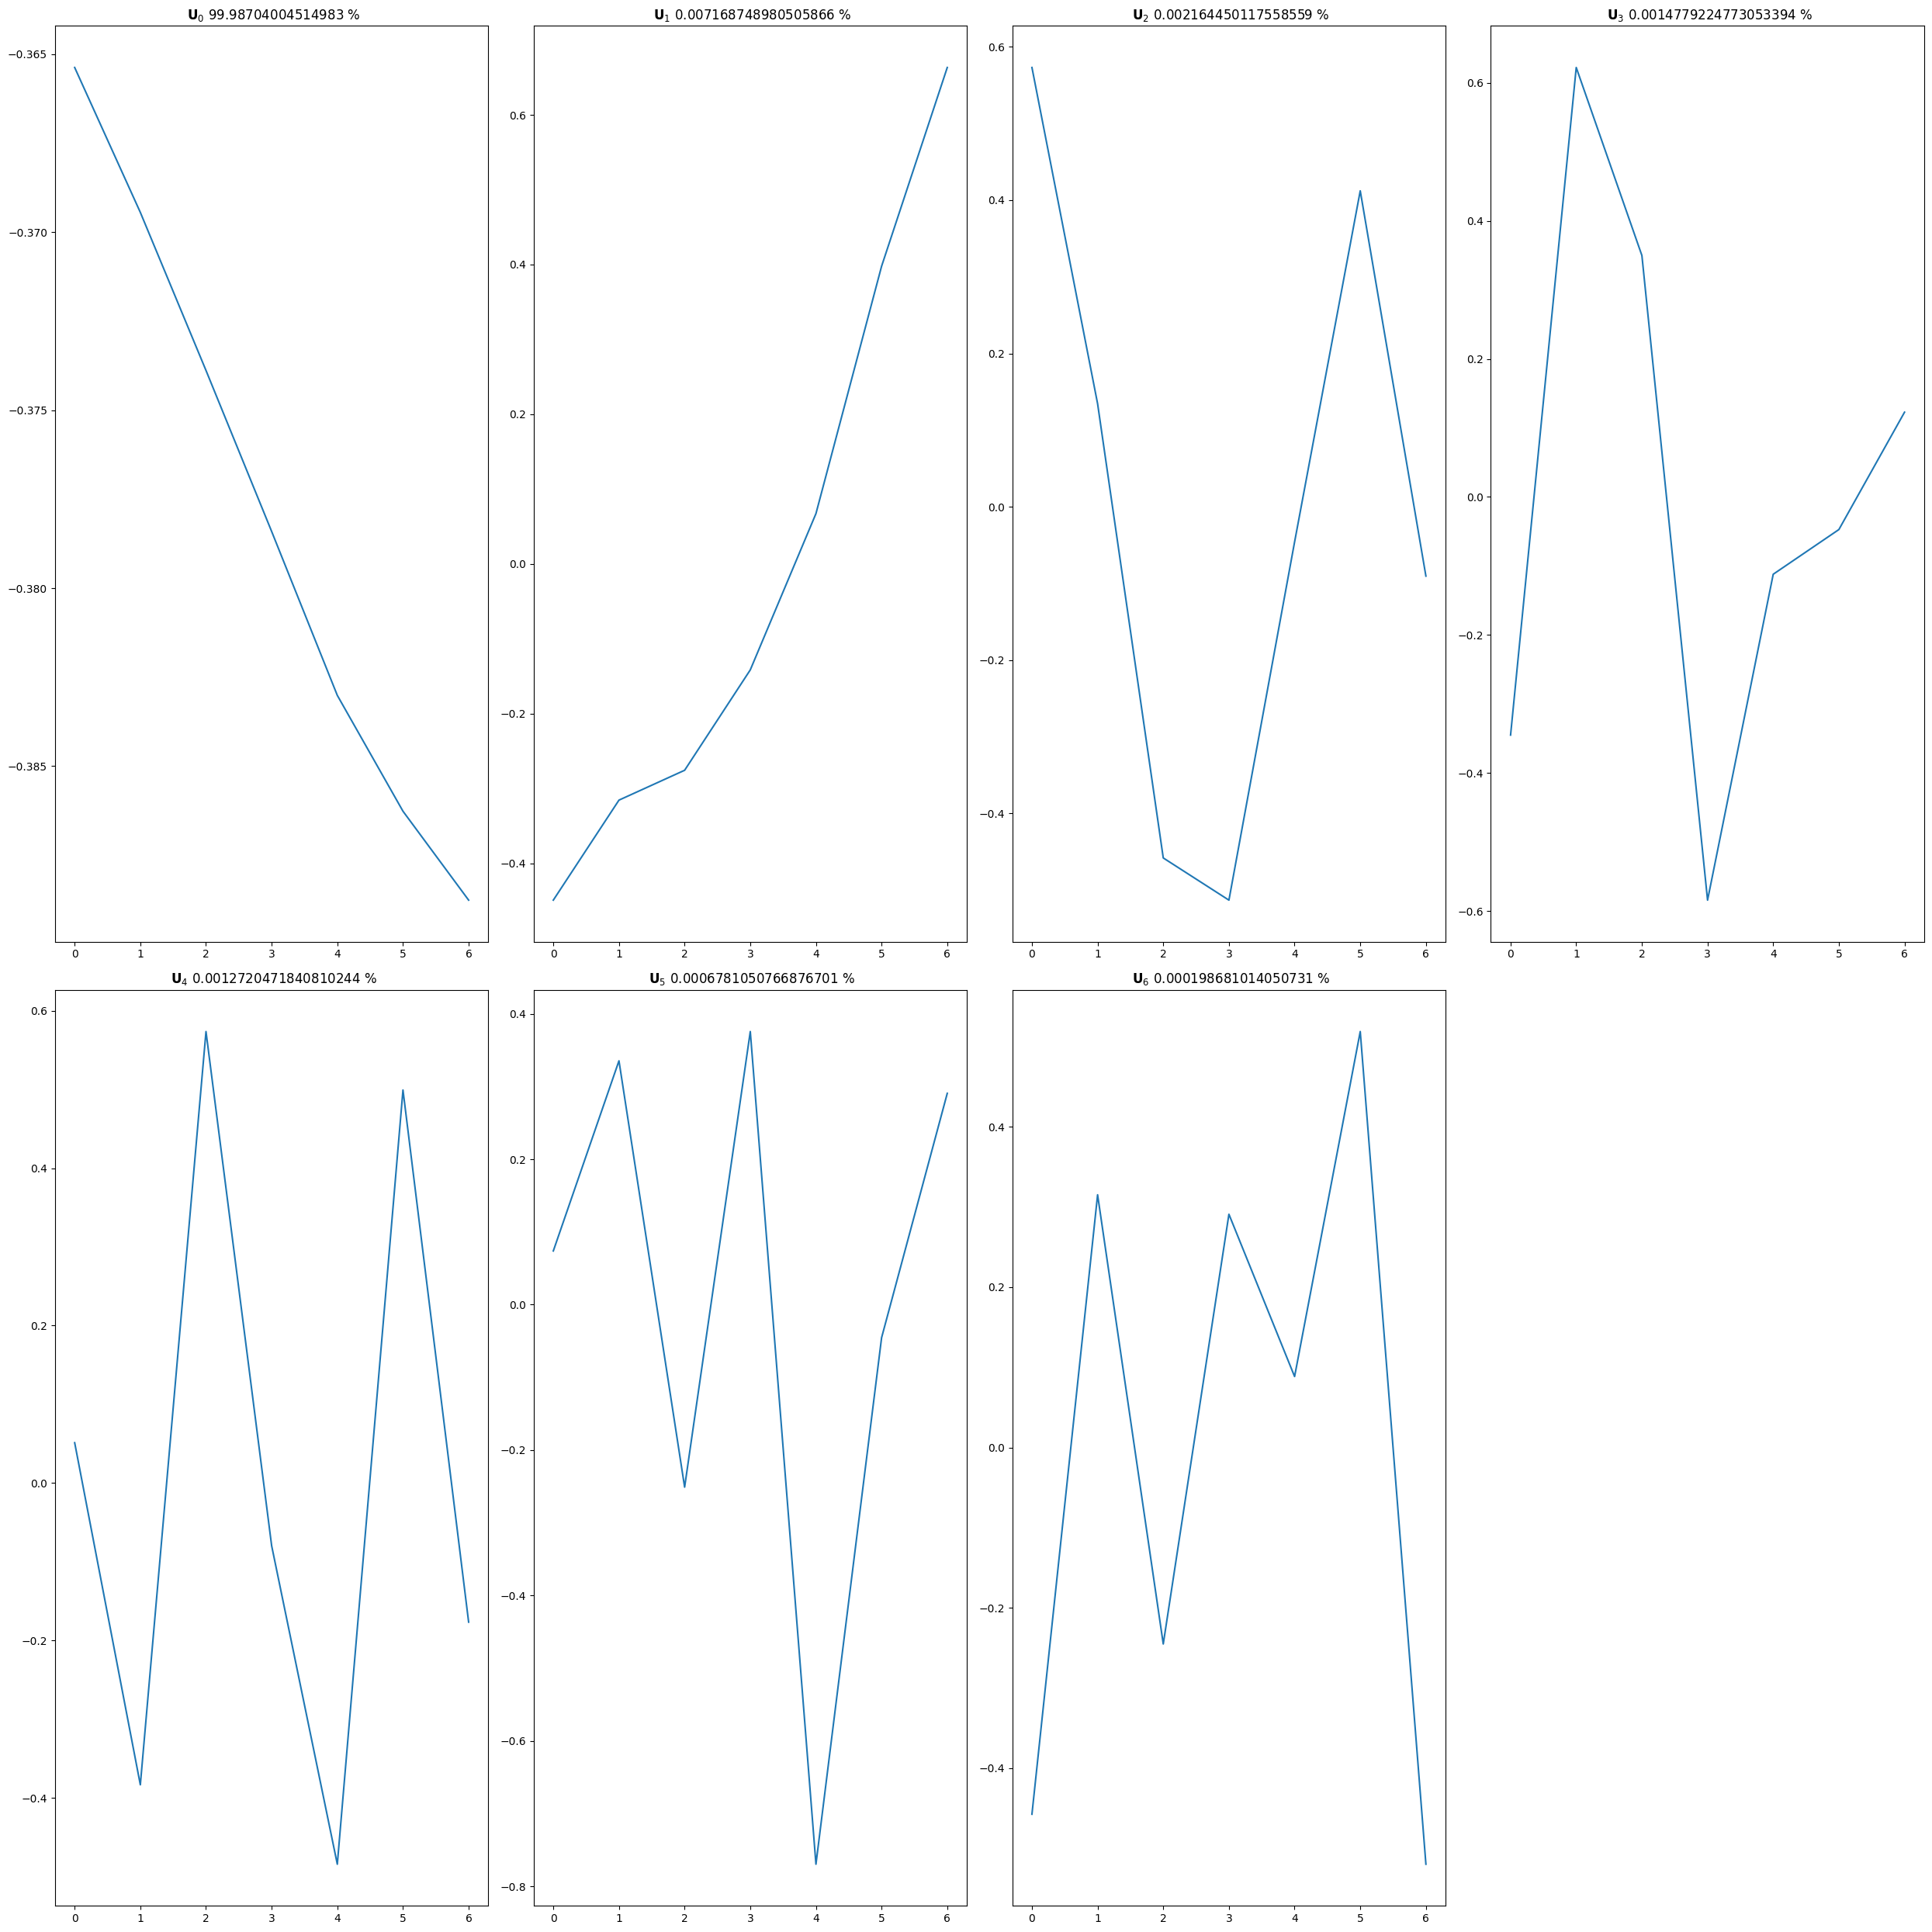

In [10]:
start_i = 0
end_i = ssa_inst.d # or less !
ssa_inst.plot_eigenvectors(i_start=start_i, i_end=end_i)

According to the figures above one can notice that the largest contribution of the eigenvalues is associated with the first component $U_0$, whose magnitude decreases monotonously without any oscillations.

This is the trend component.The seasonal component can be associated with $U_1$ to $U_2$ as they demonstrate slight oscillations and their contribution is similar.

The rest components $U_3$ to $U_6$ are associated with the noise component due to lesser contribution and greater fluctuations.


#### Inspect the Elementary Matrices

We can refine the grouping by investigating the elementary matrices $X_i$ and their patterns.
These elementary matrices are asscociated with the eigenvalues and used for the further reconstruction of the components of the time series.
Firstly, we take a look on $X_0$ which does not have any repeating pattern, this is the trend component.
Secondly, we can notice that matrices $X_1$ and $X_2$ demonstrate some kind of pattern with a varying frequency, which is lower in comparison to the rest elementary matrices. For example, $X_1$ seems to be mirrored and a bit blurred, while $X_2$ has alternating pattern. We group these matrices into the seasonality component. The rest matrices demonstrate a kind of checkboard pattern with a higher frequency, such matrices are associated with the noise component

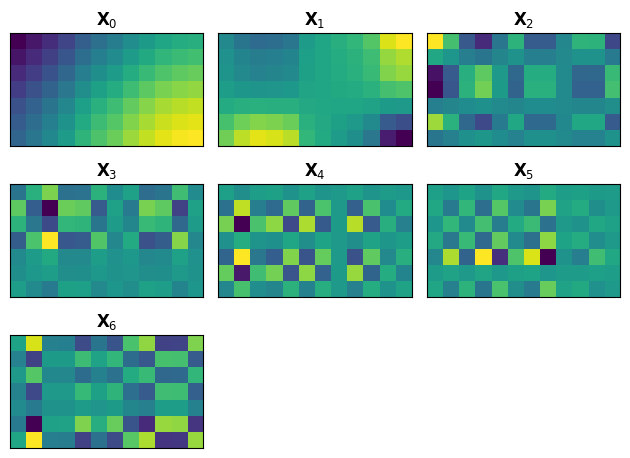

In [11]:
ssa_inst.plot_elem_matrices(i_start=start_i, i_end=end_i)

#### Investigate the Weighted Correlation Matrix

Finally, we can verify and adjust our eigentriple groups by taking into account the weighted correlation between the each of the components, reconstructed from a single elementary matrix $X_i$.
 
The weighted correlation matrix is the third tool that help us to assess the correlation between components visually and group the most correlated components together. 
It reconstructs the time series components from each elementary matrix $X_i$ and measures their correlation.

(7, 18)


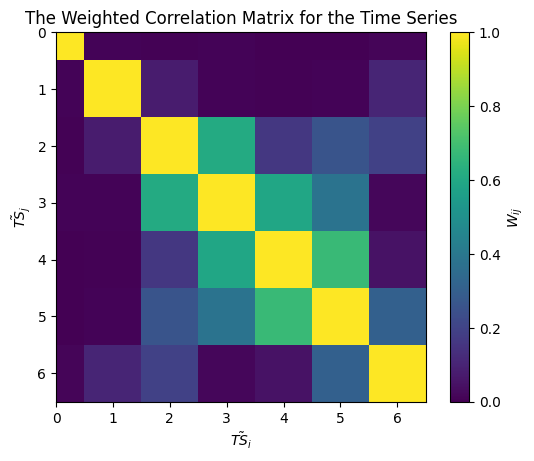

In [12]:
ssa_inst.plot_weighted_correlation_matrix()

According to the figure above, one can pick the first component $X_0$ as the trend, group the components $X_3$ - $X_6$ into the noise component due to their high correlation, while the $X_1$ and $X_2$ components can be separeted into 2 seasonal components because of their moderate correlation, or merged into one. Here we merge them for the simplicity sake.

### Component Reconstruction

Alright, by now we have grouped the elementary matrices into 3 groups:
- Trend: $X_0$
- Season: $X_1$, $X_2$
- Noise:  $X_3$, $X_4$, $X_5$, $X_6$

We can reconstruct the components as follows:

**Reconstructed Trend**

In [17]:
trend_comp_ix = [0] # index of the corresponding component, must be either list or numpy.array-> iterable
trend_comp_ts = ssa_inst.reconstruct_ts(idx_chosen_components=trend_comp_ix, return_as_df=False)
trend_comp_ts

array([ 9.66304135,  9.77627321,  9.8962619 , 10.02307524, 10.16044208,
       10.2890719 , 10.40524409, 10.54219009, 10.67729696, 10.80708473,
       10.92249523, 11.01535129, 11.12777034, 11.24133181, 11.34490495,
       11.43596405, 11.50165164, 11.55332361])

One can also output the time series as a pandas data frame

In [18]:
ssa_inst.reconstruct_ts(idx_chosen_components=trend_comp_ix, return_as_df=True)

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,9.663041,9.776273,9.896262,10.023075,10.160442,10.289072,10.405244,10.54219,10.677297,10.807085,10.922495,11.015351,11.12777,11.241332,11.344905,11.435964,11.501652,11.553324


**Reconstructed Seasonal Component**

In [15]:
season_comp_ix = [1,2] # index of the corresponding component, must be either list or numpy.array-> iterable
season_comp_ts = ssa_inst.reconstruct_ts(idx_chosen_components=season_comp_ix, return_as_df=False)
season_comp_ts

array([ 0.09718313, -0.02158916, -0.13804077, -0.15485116, -0.0741595 ,
        0.02704752,  0.02719778,  0.01701995,  0.03705539,  0.0742441 ,
        0.08528932,  0.03867619,  0.02060057,  0.02725668,  0.00829997,
       -0.08553908, -0.25762652, -0.2944874 ])

In [16]:
ssa_inst.reconstruct_ts(idx_chosen_components=season_comp_ix, return_as_df=True)

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,0.097183,-0.021589,-0.138041,-0.154851,-0.074159,0.027048,0.027198,0.01702,0.037055,0.074244,0.085289,0.038676,0.020601,0.027257,0.0083,-0.085539,-0.257627,-0.294487


**Reconstructed Noise Component**

In [20]:
noise_comp_ix = [3,4,5,6] # index of the corresponding component, must be either list or numpy.array-> iterable
noise_comp_ts = ssa_inst.reconstruct_ts(idx_chosen_components=noise_comp_ix, return_as_df=False)
noise_comp_ts

array([-0.02218448,  0.03891595,  0.04386887, -0.08699408, -0.03422258,
        0.10758058, -0.07050187,  0.03069996,  0.00057766, -0.03100883,
        0.08187545, -0.05607749, -0.03053091,  0.03450151, -0.00068492,
        0.02649502, -0.05010512,  0.03149379])

In [21]:
ssa_inst.reconstruct_ts(idx_chosen_components=noise_comp_ix, return_as_df=True)

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,France,-0.022184,0.038916,0.043869,-0.086994,-0.034223,0.107581,-0.070502,0.0307,0.000578,-0.031009,0.081875,-0.056077,-0.030531,0.034502,-0.000685,0.026495,-0.050105,0.031494


Then we can plot the reconstructed components to check the validity of the results. **The sum of the reconstructed time series must converge to the original time series**.

For this purpose we introduce a **full_rec** variable which contains the values of the sum of the reconstructed time series for a chosen country. 

One can clean a desired time series from unwanted components, e.g clean the data from the noise by excluding the corressponding reconstructed time series from the sum in **full_rec**.

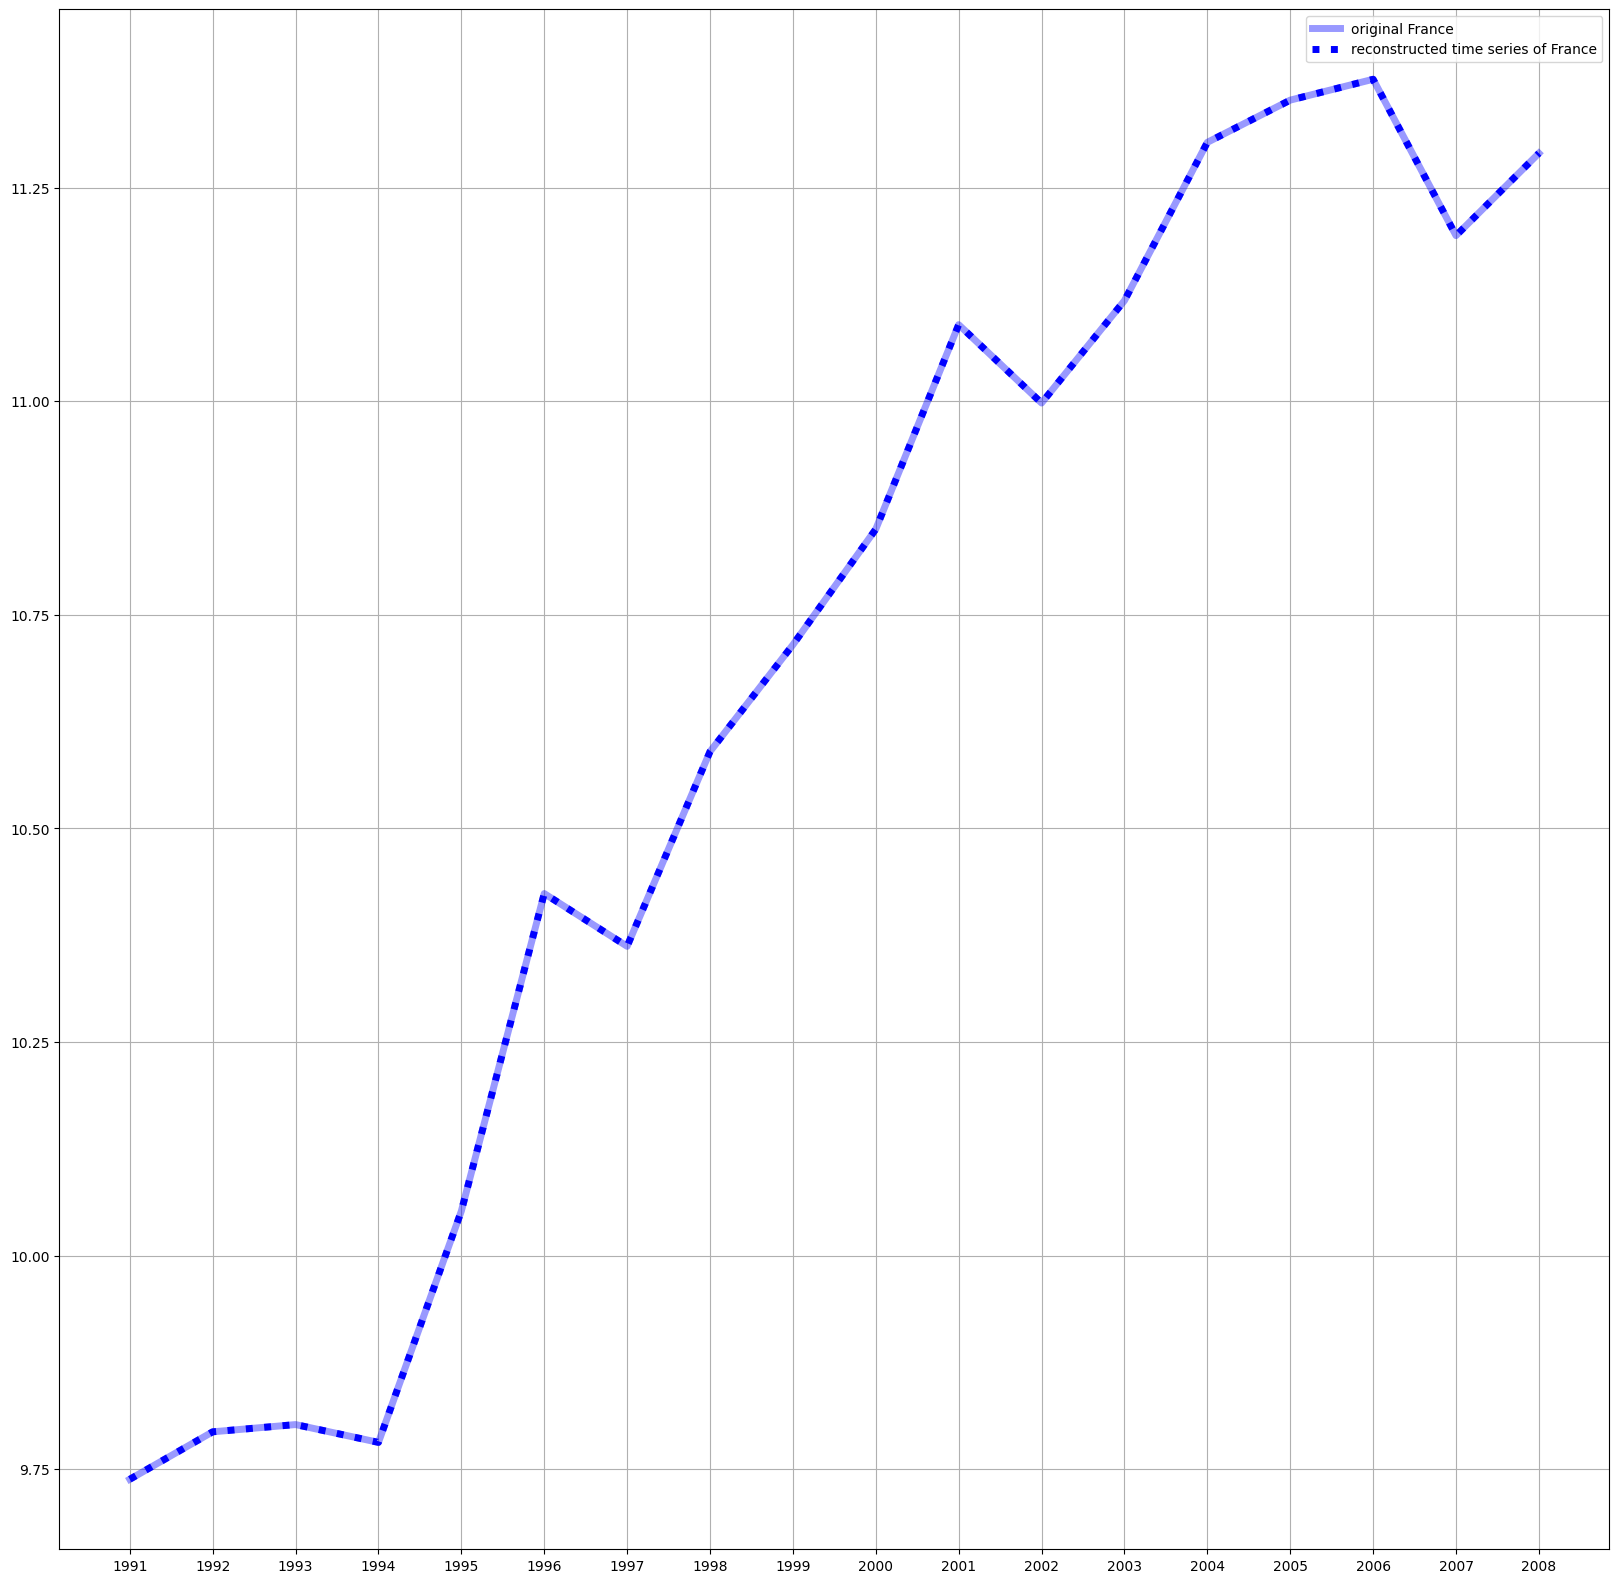

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 20))
col=["b","r", "g", "c","orange", "purple", "pink", "gray"]
plt.plot(   df.columns[idx_start:], df.iloc[ts_index,idx_start:],ls='solid',alpha=0.4, color=col[ts_index], lw=5,label=f"original {df.iloc[ts_index,0]}" )
full_rec = np.array( trend_comp_ts   + season_comp_ts + noise_comp_ts ).flatten() # contains i-th time series
plt.plot(df.columns[idx_start:], full_rec,    ls=':', color=col[ts_index] ,lw=5, label=f"reconstructed time series of {df.iloc[ts_index,0]}")
plt.legend()
plt.grid()

### Forecast Future Values

It is also possible to use SSA to predict future values for the time series!
The **SSA** class in the **py-ssa-lib** implements so-called **L-Forecast** Method using **Linear Recurrence Relation(LRR)**.

The **SSA**  computes the **LRR** for each time series if applied on multiple time series .
One can predict values for each of the reconstructed component using corresponding indices, or for the original time series.

For example,  we want to forecast $M=3$ values for the *denoised* time series. 

For this purpose, we group the trend and the seasonal components together and input indices of the elemenatary components used for their reconstruction as follows:

In [17]:
M_ = 3 # number of values to "predict"
idx_denoised = [0,1,2] # indices of the components
denoised_given_and_future_values = np.zeros((len(idx_denoised) , trend_comp_ts.shape[0]+M_))
for i in idx_denoised:
    # reconstruct EACH component separetely and predict future values
    i_comp = ssa_inst.reconstruct_ts(idx_chosen_components=[i], return_as_df=False)
    denoised_given_and_future_values[i,:] = ssa_inst.L_Forecast(ts = i_comp, M=M_, idx_components=[i], mode='forward')
    

To display only the $M$ predicted values for each of components, we can mask the resulting array as follows:

In [18]:
idx_ = 0 # or any other index from the idx_denoised
denoised_given_and_future_values[idx_,:][-M_:]

array([11.74984542, 11.8571771 , 11.96357712])

Also we can forecast values for each component separately. Their sum results in the predicted values for the original time series:

In [19]:
M_ = 5# number of  values to "predict"
idx_all = [0,1,2,3,4,5,6] # indices of the components
all_given_and_future_values = np.zeros((len(idx_all) , trend_comp_ts.shape[0]+M_))

for i in idx_all:
    # reconstruct EACH component separetely and predict future values
    i_comp = ssa_inst.reconstruct_ts(idx_chosen_components=[i], return_as_df=False)
    all_given_and_future_values[i,:] = ssa_inst.L_Forecast(ts = i_comp, M=M_, idx_components=[i], mode='forward')


sum_given_and_future_values = all_given_and_future_values.sum(axis=0)

In [20]:
sum_given_and_future_values

array([ 9.73804   ,  9.7936    ,  9.80209   ,  9.78123   , 10.05206   ,
       10.4237    , 10.36194   , 10.58991   , 10.71493   , 10.85032   ,
       11.08966   , 10.99795   , 11.11784   , 11.30309   , 11.35252   ,
       11.37692   , 11.19392   , 11.29033   , 11.57503708, 11.81685524,
       12.09505829, 12.40783045, 12.62422651])

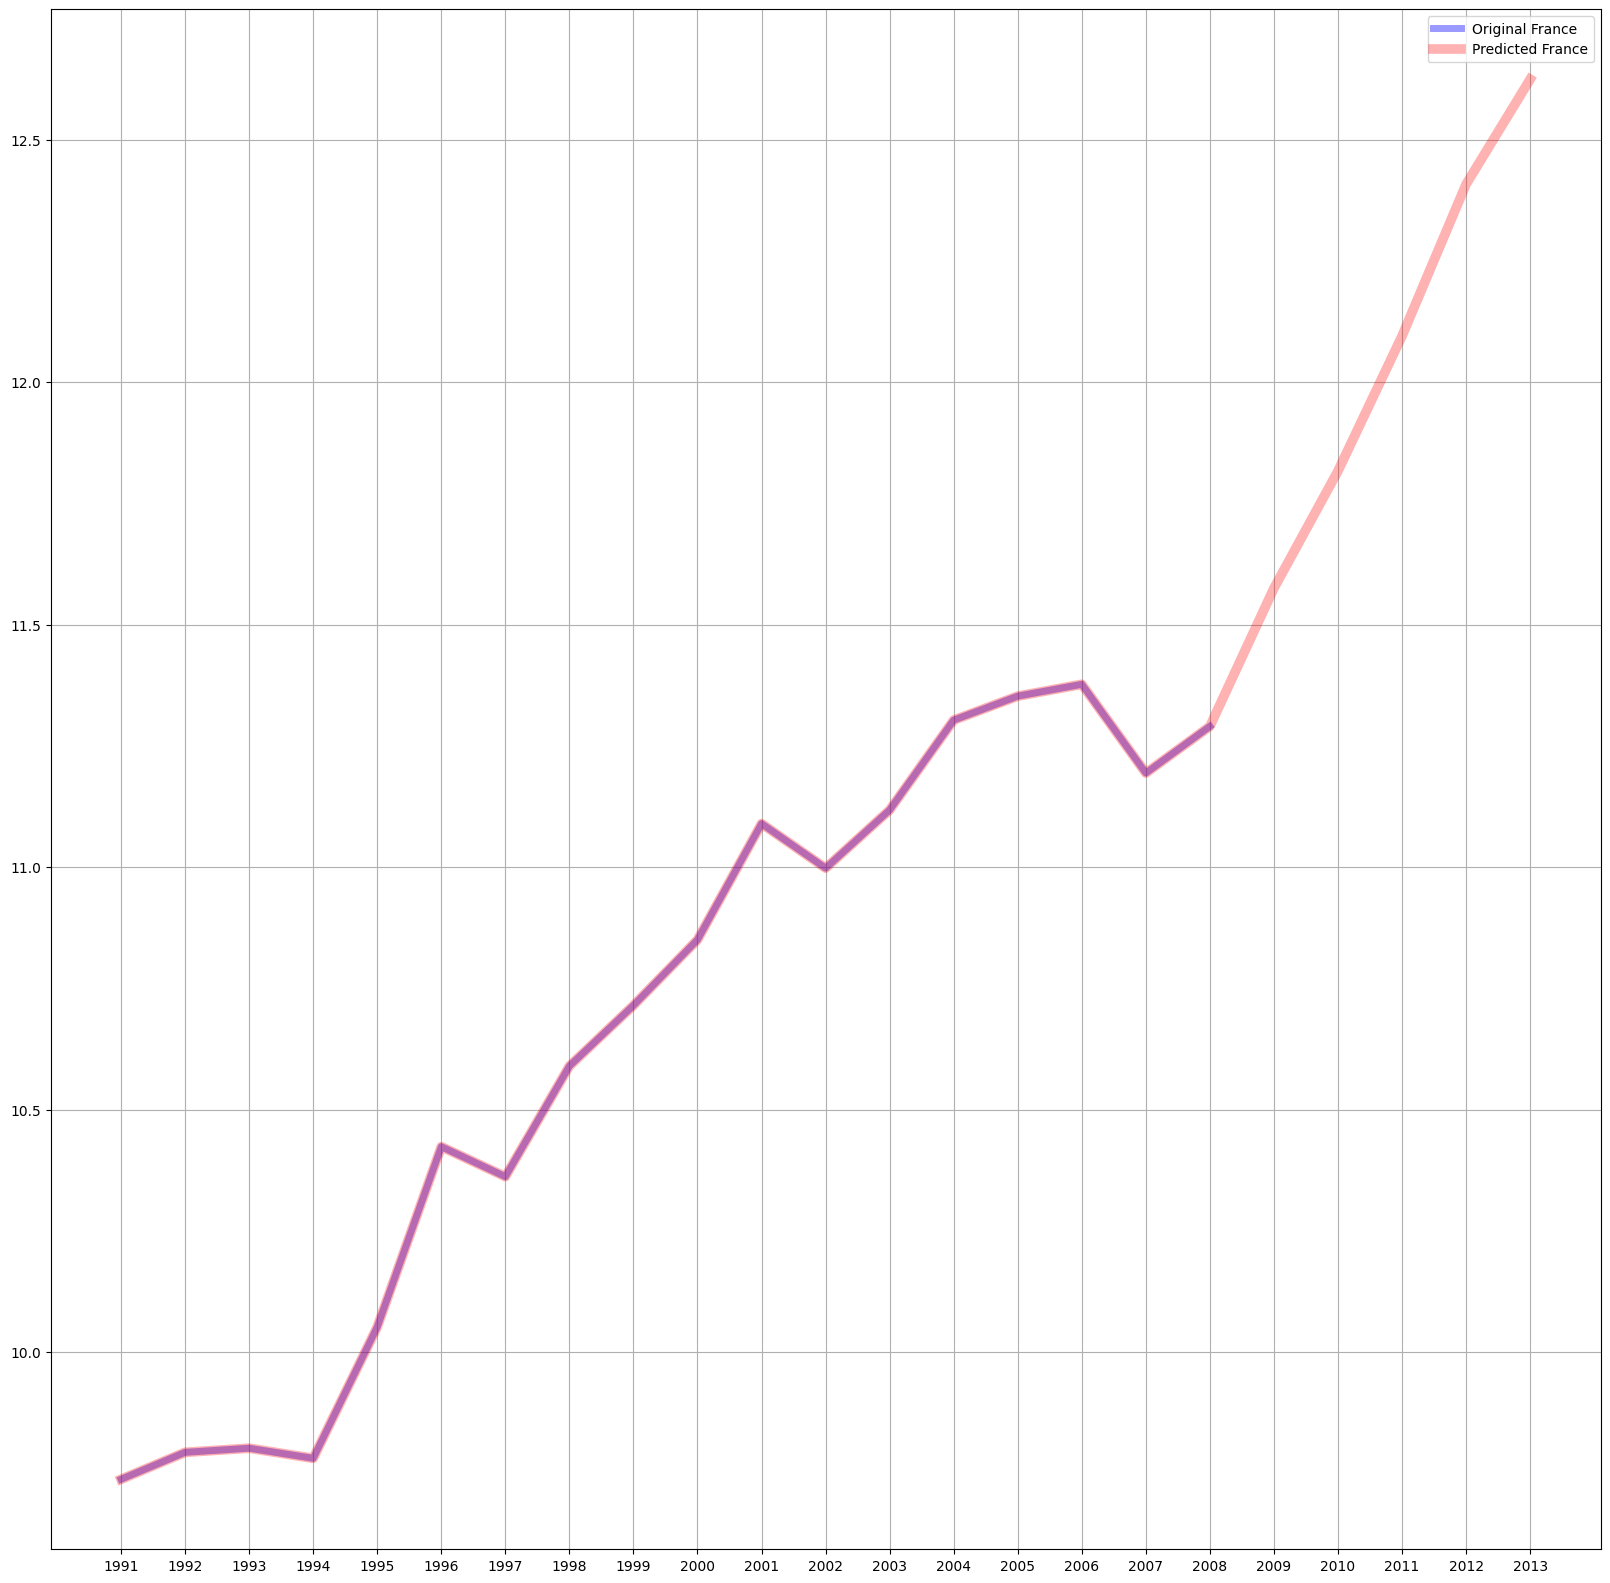

In [23]:
plt.figure(figsize=(20, 20))

plt.plot( df.columns[idx_start:], df.iloc[ts_index,idx_start:],ls='solid',alpha=0.4, color=col[ts_index], lw=5,label=f"Original {df.iloc[ts_index,0]}" )


plt.plot(list(df.columns[idx_start:])+[str(int(df.columns[-1]) +i) for i in range(1,M_+1)] , sum_given_and_future_values,   ls='solid', alpha=0.3, color=col[ts_index+1], lw=7,label=f"Predicted {df.iloc[ts_index,0]}")        

plt.legend()
plt.grid()

### Estimation of the LRR Coefficients

The L-forecasting method heavily relies on the estimated **LRR-Coefficients**. One can estimate them as follows: 

In [26]:
ssa_inst.estimate_LRR(idx_components= np.arange(ssa_inst.L-1))

array([-0.88006834,  0.60639063, -0.47148756,  0.55971835,  0.17029075,
        0.99814046])

**Note :** the maximal number of used elementary components  should not exceed $L-1$. Otherwise, the verticality coefficient would sum up to 1, which does not yield the correct result.

### ESPRIT

It is also possible to estimate the parameters of the sinusoids comprising the signal by using **ESPRIT** algorithm. The ouptut result represents the complex roots of the characteristic polynom $\mu$, which can be decomposed into real $\omega$ and imaginary $\rho$ components.

In [27]:
ssa_inst.estimate_ESPRIT(idx_components= np.arange(ssa_inst.L-1), decompose_rho_omega= False)

array([ 1.19055399+0.j        ,  1.01768199+0.j        ,
        0.14407805+0.84729958j,  0.14407805-0.84729958j,
       -0.74912581+0.64972775j, -0.74912581-0.64972775j])

Again, **note :** the maximal number of used elementary components  should not exceed $L-1$. Otherwise, the result is invalid.
One can plot the roots on the unit circle as follows:

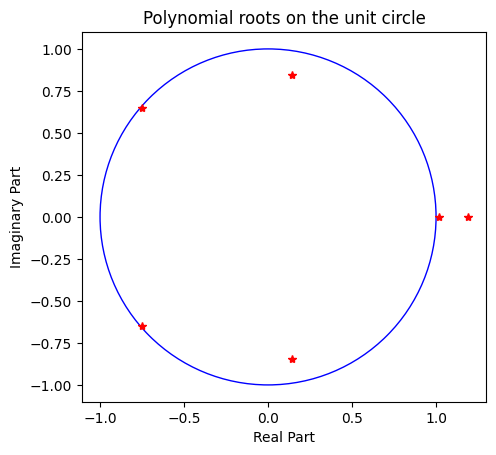

In [28]:
ssa_inst.plot_polynomial_roots(idx_components= np.arange(ssa_inst.L-1))

## Application of the SSA on Multiple Time Series

One can also apply the SSA on multivariate time series by iterating through them one-by-one. Two approaches are possible:

1. Create an instance of the SSA class and apply it on each of time series
2. Create instances of the SSA class applying on each time series 

The first method preserves only the last SSA object, however it is possible to preserve particular properties using methods of SSA in arrays allocated prior to the end of each iteration step.

Obviously, the second approach is more resource demanding, since it preserves all inner parameters of the SSA for each time series.

It might be not applicable for a larger sets of time series.

In [29]:
S_ = df.shape[0]# number of time series
N_ = df.shape[1] -1# because Country column is a label =>N-i_start_ts
window_s_ = 7 # window length 
idx_start_ts_ = 1 # first numeric column 
decomposition_ = "svd"


# M_estimated_ = 5
# mode_ = 'retrospective'

M_future_ = 4 # number of forecasted values
mode_ = 'forward'

We can create a wrapper function, which generates instances of the SSA class, and optionally stores them and related inner parameters.

### SSA Ensemble

In [30]:
def SSA_Ensemble(df, S,window_s, N,decomposition,M_, idx_start_ts=idx_start_ts_, mode='forward',SSA_cache=True):
    all_ts_full_components = np.zeros((S,window_s, N ))
    if mode =='retrospective':
        all_ts_pred_comps = np.zeros((S, window_s, N ))
    else:
        all_ts_pred_comps = np.zeros((S, window_s,N+M_ ))
    all_lrrs = np.zeros((S,window_s-1, window_s-1 ))
    ssa_list=[]
    for s in range(0, S):
            all_ssa_inst = SSA(Verbose=False);
            all_ssa_inst.fit(df=df,decomposition=decomposition, idx_start_ts=idx_start_ts_, ts=s,L=window_s)
            if SSA_cache:
               ssa_list.append(all_ssa_inst) 
            
            for l in range(0, window_s):
               
                all_ts_full_components[s, l, :]  = all_ssa_inst.reconstruct_ts(idx_chosen_components=[l],return_as_df=False)
                all_ts_pred_comps[s, l, :] = all_ssa_inst.L_Forecast(all_ts_full_components[s, l, :], M=M_, idx_components=[l], mode=mode)
    if SSA_cache:
        return all_ts_full_components, all_ts_pred_comps, ssa_list
    else:
        return all_ts_full_components, all_ts_pred_comps

Now we can apply the SSA iteratively, in order to preserve SSA instances we set **SSA_cache=True**. 
This function will output not only the reconstructed components and predictions, but also a list of used SSA instances .

In [31]:
recs, preds,ssas  = SSA_Ensemble(df=df, S=S_,window_s=window_s_, M_=M_future_,N=N_,decomposition=decomposition_, idx_start_ts=idx_start_ts_, mode=mode_,SSA_cache=True)

### Access to Particular SSA Instances 

One can get an acces to a particular SSA instance by its index and invoking its property or method. For example, let us inspect the correlation matrix for the third SSA instance for the third time series

#### The Weighted Correlation Matrix

(7, 18)


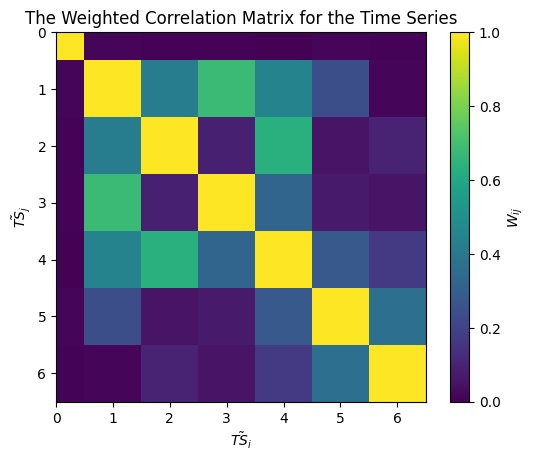

In [32]:
ssas[2].plot_weighted_correlation_matrix()

#### Eigenvalue Contribution

Similarly, we can plot eigenvalues contribution, elementary matrices and eigenvectors

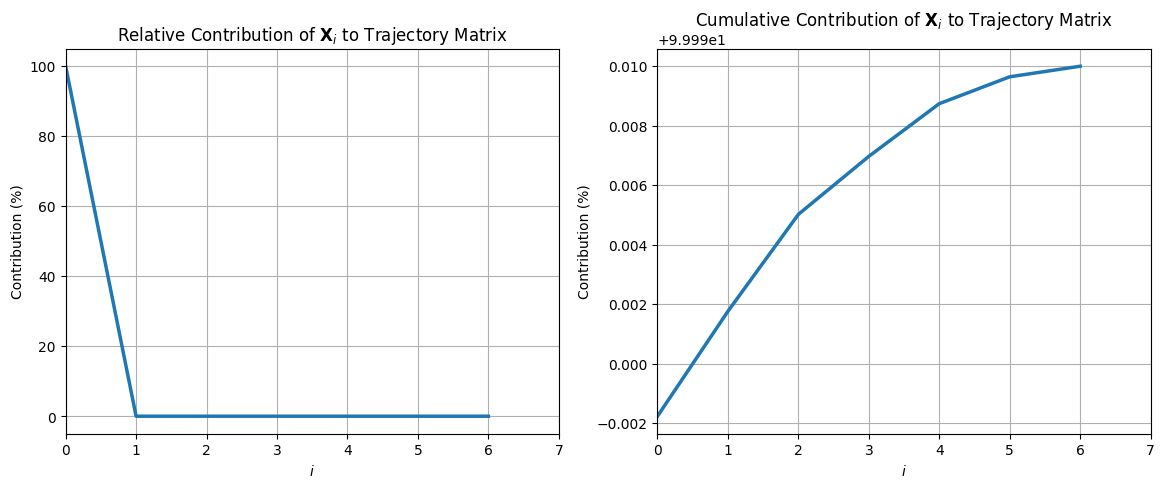

In [33]:
ssas[2].plot_eigenvals_contribution()

#### Elementary Matrices

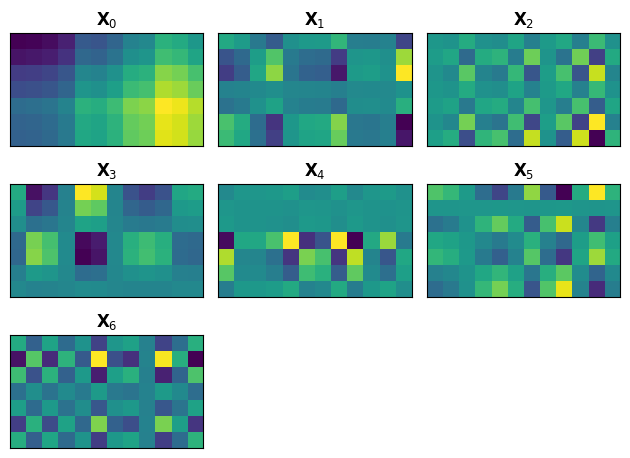

In [34]:
ssas[2].plot_elem_matrices(0, ssas[2].L)

#### Eigenvectors $U$

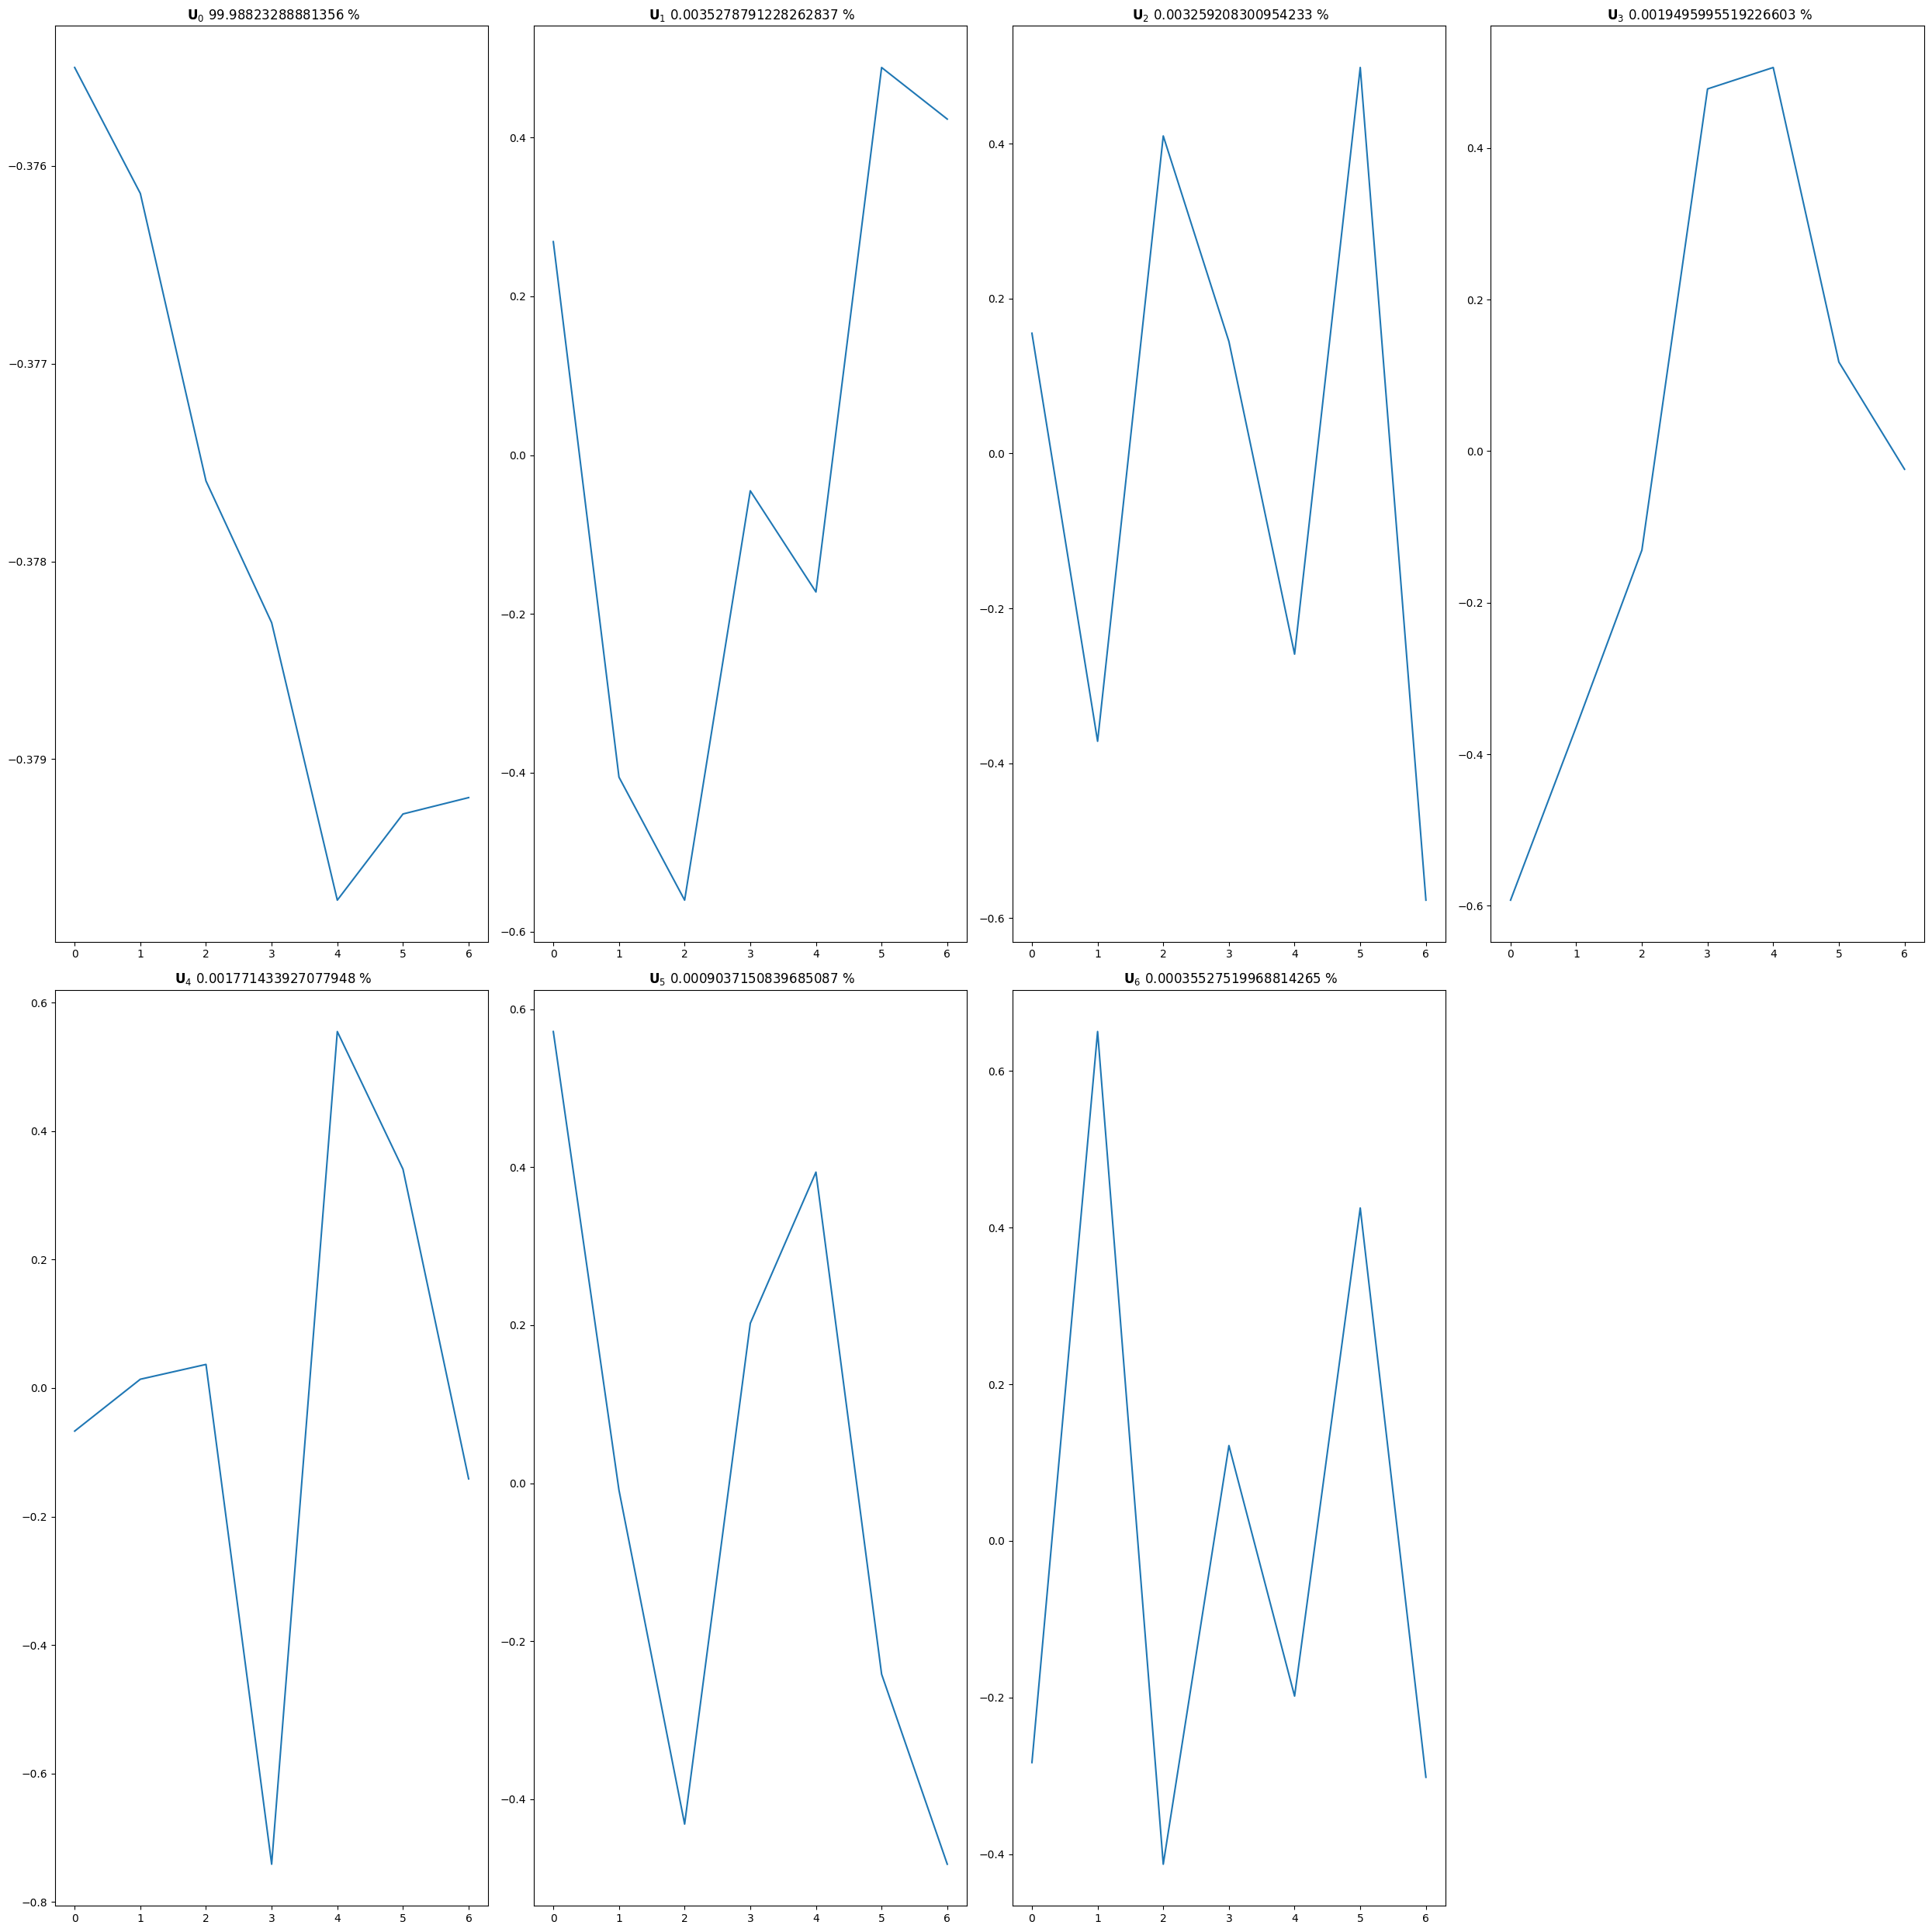

In [35]:
ssas[2].plot_eigenvectors(0, ssas[2].L)

#### Visualize Forecasted (or Estimated) Values

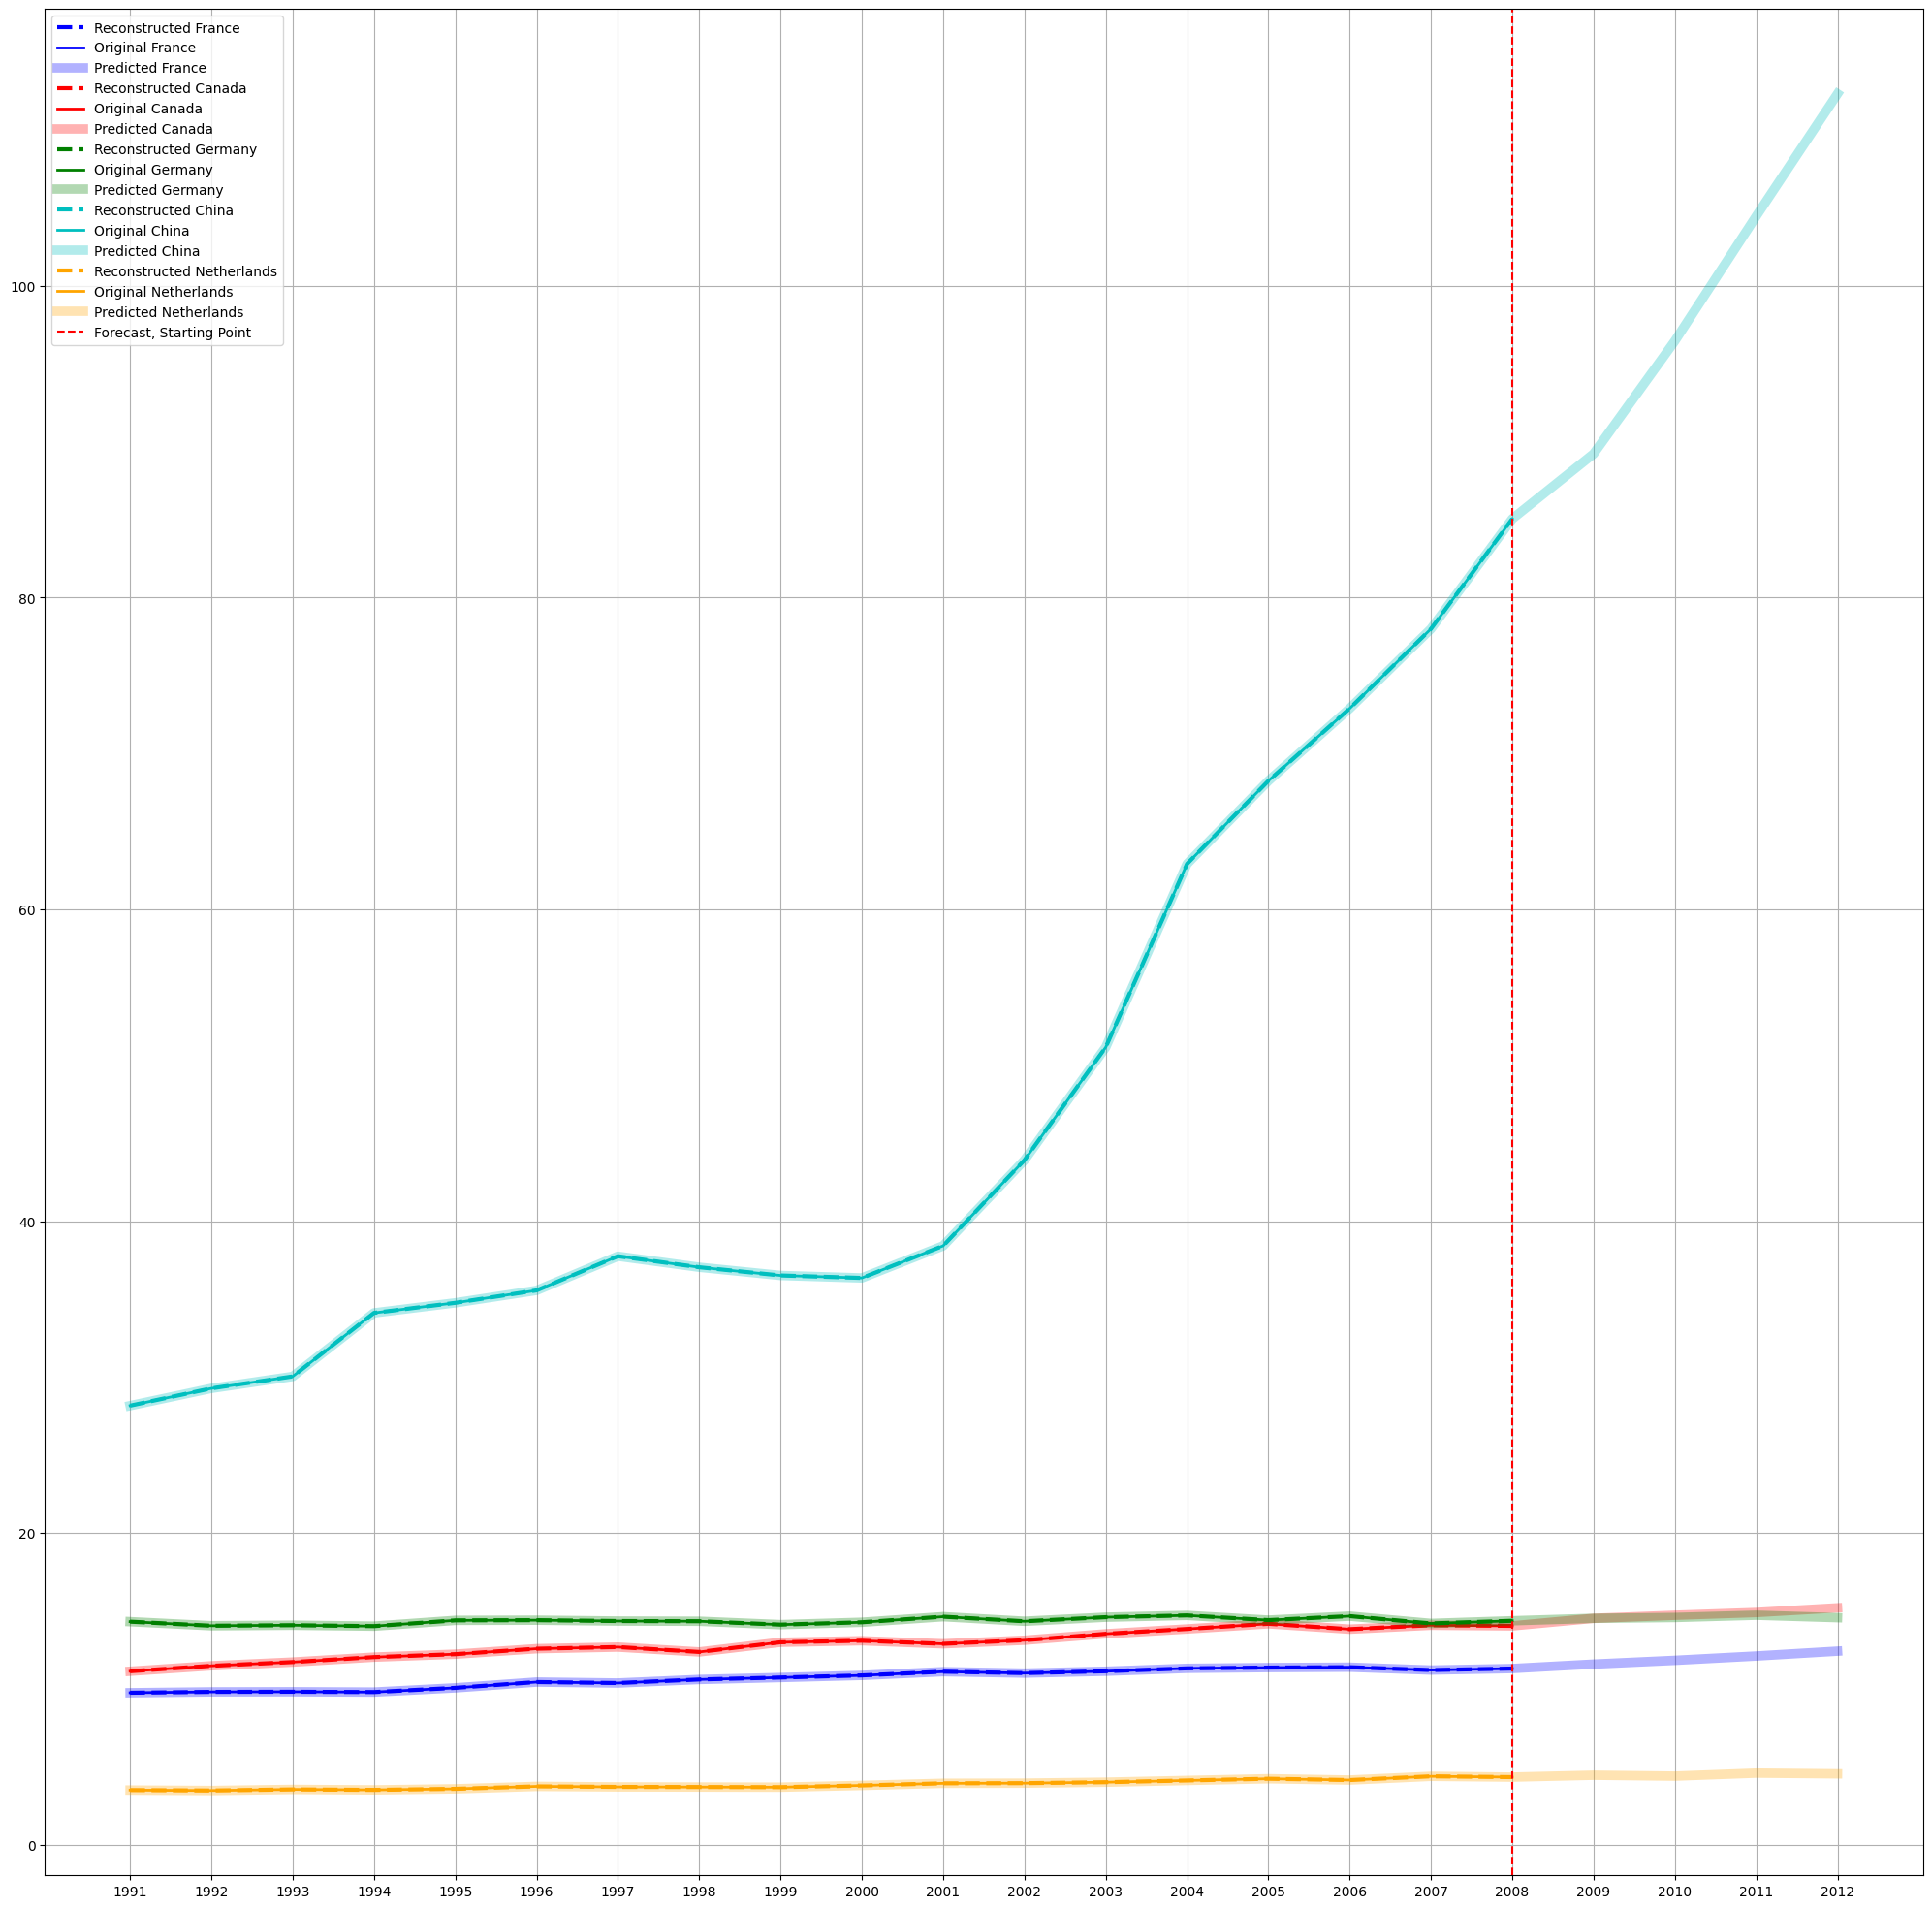

In [38]:
plt.figure(figsize=(25, 25))
col=["b","r", "g", "c","orange", "purple", "pink", "gray","steelblue", "magenta"]
mk = [ ":","--","-.","-"]
for s in range(0,S_):
   
    plt.plot( df.columns[idx_start_ts_:],recs[s,:,:].sum(0),    mk[1] ,color=col[s], lw=3,label=f"Reconstructed {df.iloc[s,0]}")
    
    plt.plot(  df.columns[idx_start_ts_:],df.iloc[s,idx_start_ts_:],  mk[3], color=col[s],lw=2,label=f"Original {df.iloc[s,0]}" )
    if mode_=="retrospective":
        plt.plot( df.columns[idx_start_ts_:],preds[s,:,:].sum(0),   mk[0] ,alpha=0.3, color=col[s], lw=7,label=f"Estimated {df.iloc[s,0]}")
    else:
        plt.plot(list(df.columns[idx_start:])+[str(int(df.columns[-1]) +i) for i in range(1,M_future_+1)] , preds[s,:,:].sum(0),   "-" ,alpha=0.3, color=col[s], lw=7,label=f"Predicted {df.iloc[s,0]}")
       
if mode_=="retrospective":
    plt.axvline(x=df.columns[M_-1], ls='--', color="r", label="Estimate, Starting Point")
else:
    plt.axvline(x=df.columns[-1], ls='--', color="r", label="Forecast, Starting Point")       
plt.legend()
plt.grid()

#### Roots of Characteristic Polynom of a Particular SSA Instance

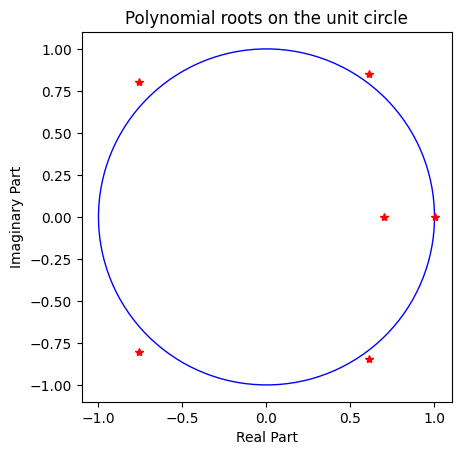

In [39]:
ssas[2].plot_polynomial_roots(idx_components=np.arange(ssas[2].L-1))